In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1. Load Date

In [6]:
user = pd.read_csv('/Users/ChunyanHao/desktop/github/ds_take_home/data/Engagement_Test/user_table.csv')
test = pd.read_csv('/Users/ChunyanHao/desktop/github/ds_take_home/data/Engagement_Test/test_table.csv')

In [7]:
user.head(3)

,user_id,signup_date
0,34,2015-01-01
1,59,2015-01-01
2,178,2015-01-01


In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      100000 non-null  int64 
 1   signup_date  100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [9]:
for column in user.columns:
    uniques = user[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

user_id              100000	 [ 34  59 178 285 383]
signup_date            243	 ['2015-01-01' '2015-01-02' '2015-01-03' '2015-01-04' '2015-01-05']


In [10]:
test.head(3)

,user_id,date,browser,test,pages_visited
0,600597,2015-08-13,IE,0,2
1,4410028,2015-08-26,Chrome,1,5
2,6004777,2015-08-17,Chrome,0,8


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        100000 non-null  int64 
 1   date           100000 non-null  object
 2   browser        100000 non-null  object
 3   test           100000 non-null  int64 
 4   pages_visited  100000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.8+ MB


In [12]:
for column in test.columns:
    uniques = test[column].unique()
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:5])

user_id              100000	 [ 600597 4410028 6004777 5990330 3622310]
date                    31	 ['2015-08-13' '2015-08-26' '2015-08-17' '2015-08-27' '2015-08-07']
browser                  5	 ['IE' 'Chrome' 'Safari' 'Firefox' 'Opera']
test                     2	 [0 1]
pages_visited           18	 [ 2  5  8  1 10]


In [37]:
data = pd.merge(left = user, right = test)
data['signup_date'] = pd.to_datetime(data['signup_date'])
data['date'] = pd.to_datetime(data['date'])
data.head(3)

,user_id,signup_date,date,browser,test,pages_visited
0,34,2015-01-01,2015-08-15,Chrome,0,6
1,59,2015-01-01,2015-08-12,Chrome,1,6
2,178,2015-01-01,2015-08-10,Safari,1,3


### 2. Question 1 Is the test winning? 

That is, should 100% of the users see the Recommended Friends feature?

In [16]:
from scipy.stats import ttest_ind

In [35]:
page_with_new_features = data[data.test == 1]['pages_visited']
page_with_new_features_mean = page_with_new_features .mean()

page_without_new_features = data[data.test == 0]['pages_visited']
page_without_new_features_mean = page_without_new_features .mean()

result = ttest_ind(page_with_new_features, page_without_new_features, axis=0, equal_var=False)
pvalue = result.pvalue

print('A_B_test for "Recommended Friends": \n')
print('{0:15s} {1:13s} {2:>12s} {3:>10s}'.format(
    'page_mean_new', 'page_mean_old', 'amount_diff', 'P-value'))
print('-' * 70)

print('{0:10.2f} {1:13.2f} {2:14.2f} {3:12.2f}'.format(
            page_with_new_features_mean, page_without_new_features_mean, 
    page_with_new_features_mean - page_without_new_features_mean, pvalue))

A_B_test for "Recommended Friends": 

page_mean_new   page_mean_old  amount_diff    P-value
----------------------------------------------------------------------
      4.60          4.61          -0.01         0.58


From the AB test result above, it's clear that the P-value is extremely large and therefore, there is no difference in 'page_visited' between test and control group.

should not launch the new feature.

### Question 2  

Is the test performing similarly for all user segments or are there differences among different segments?


We can explore the user's segment base on his/her 'signup_date', 'signin_date', and 'browser'

In [66]:
data['interval'] = (data['date'] - data['signup_date']).astype(int)
data['same_day'] = data['interval'] == 0

In [40]:
data['visit_week_day'] = data['date'].dt.weekday

<AxesSubplot:xlabel='browser', ylabel='pages_visited'>

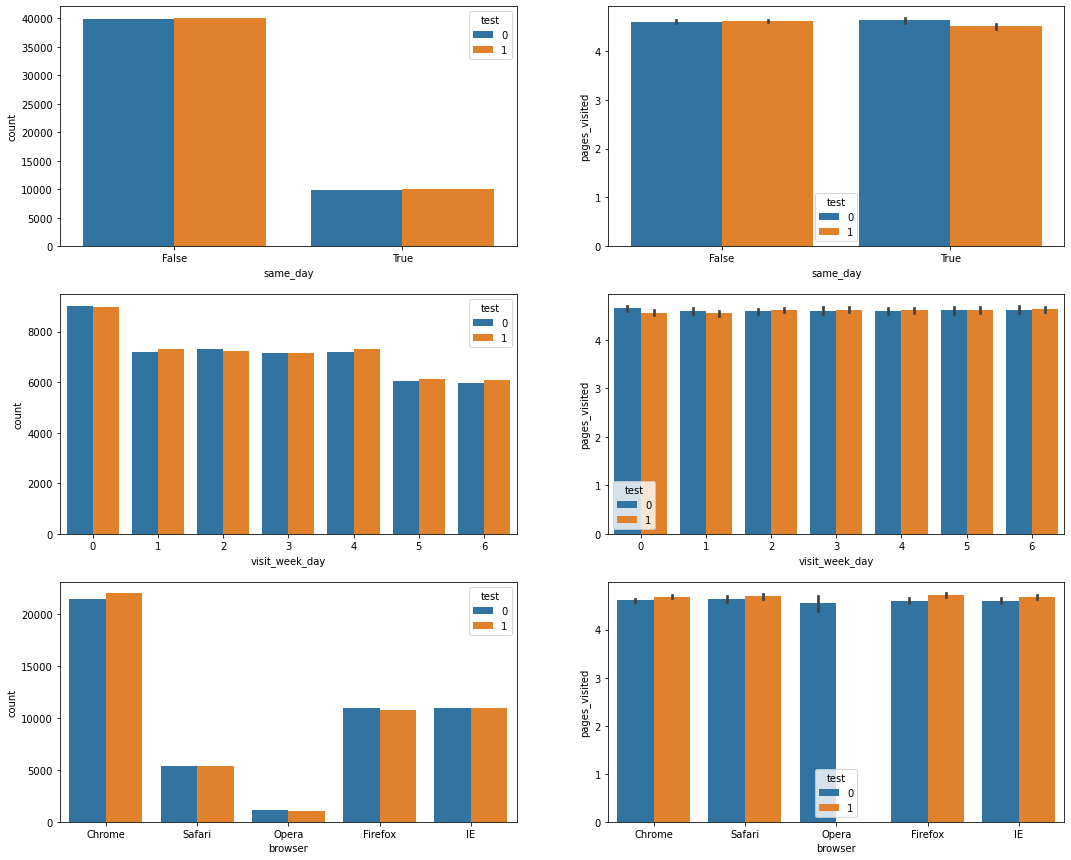

In [72]:
fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot(data = data, x = 'same_day', hue = 'test', ax = ax[0][0])
sns.barplot(data = data, x = 'same_day', y = 'pages_visited', hue = 'test', estimator = np.mean, ax = ax[0][1])

sns.countplot(data = data, x = 'visit_week_day', hue = 'test', ax = ax[1][0])
sns.barplot(data = data, x = 'visit_week_day', y = 'pages_visited', hue = 'test', estimator = np.mean, ax = ax[1][1])

sns.countplot(data = data, x = 'browser', hue = 'test', ax = ax[2][0])
sns.barplot(data = data, x = 'browser', y = 'pages_visited', hue = 'test', estimator = np.mean , ax = ax[2][1])

We didn't detect significant difference in the data distribution among control and test group. So we can say that the test performs similarly for all user segments.

### Question 3

If you identified segments that responded differently to the test, can you guess the reason? Would this change your point 1 conclusions?